# Forage - British Airways - Task 1

### This British Airways project is from [Forage](https://www.theforage.com) and is my first Github submission. The brief is to scrape and collect customer feedback and present insights using a single PowerPoint slide.

*"British Airways (BA) is the flag carrier airline of the United Kingdom (UK). As a data scientist at BA, it will be your job to apply your analytical skills to influence real life decisions. Customers who book a flight with BA will experience many interaction points with the BA brand. Understanding a customer's feelings, needs, and feedback is crucial for any business, including BA."*

This first task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights you may uncover.

I will:
- Scrape this data
- Clean the data
- Apply Sentiment Analysis
- Create Visualisations for the Powerpoint Slide

**Scrape data from the web** - The first thing I will do is scrape review data from the provided data source, Skytrax.

The jupyter notebook provided by Forage contains the intial code to scrape and store the data, using the following tools. BeautifulSoup, for scraping data. Pandas, for working with data sets and the Requests module, to send HTTP requests using Python.

In [6]:
# Tools to scrape and read data
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
# Web scraping variables set to collect 3000 reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# Iterate the above variables through the scraping tool
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [8]:
# Creating review df
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British Airways oversold my...
1,✅ Trip Verified | I travelled London to Doha ...
2,✅ Trip Verified | When dropping off my luggag...
3,✅ Trip Verified | If you can’t fly First Class...
4,Not Verified | Singapore to Heathrow. Busine...


In [9]:
# Saving df as csv
df.to_csv("BA_reviews.csv")

I now have the dataset for this task. The loops above collected 3000 reviews by iterating through the paginated pages on the website.

I will now clean the review data ready for processing. To allow accurate sentiment analysis I will streamline the review data by making it more uniform. I followed the text preprocessing techniques on [Medium](https://medium.com/@pawan329/text-data-preprocessing-made-easy-steps-to-clean-text-data-using-python-81a138a0e0e3) by [Pawan Yadav](https://www.linkedin.com/in/pawanyadav329/).

I'll import the Python libraries that will assist us in cleaning the text data and perform NLP (Natural Language Processing).

In [10]:
# Data processing and visualisation tools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Tools
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


The start of each review states whether it's a verified review or not, I will be removing this text during the clean but think the data is useful so I shall add a column, 'verified_review', to hold this info.

In [11]:
# Create the 'verified_review' column and print results
df['verified_review'] = df['reviews'].apply(lambda x: '✅ Trip Verified' in x)
print(df['verified_review'].value_counts())


# Double checking the accuracy by checking the original text
count_verified = df['reviews'].str.contains('✅ Trip Verified').sum()
print(f"Number of '✅ Trip Verified' occurrences: {count_verified}")

verified_review
False    1752
True     1248
Name: count, dtype: int64
Number of '✅ Trip Verified' occurrences: 1248


I shall create several functions that will perform specific text cleaning and NLP tasks and bring them all together in one function at the end.

1. **Preprocessing** involves converting the text to lowercase, removing any special characters, and tokenizing the text (splitting it into individual words or tokens).
2. **Removing Stopwords**. Stopwords are common words like “the,” “is,” “and,” etc., which do not add much value to the analysis. Removing them can reduce noise in the text data.
3. **Lemmatization** is a technique to reduce words to their base or root form. This step helps in consolidating words with the same meaning.
4. **Tokenization** is the process of breaking down a piece of text, like a sentence or a paragraph, into individual words or tokens. Tokenization helps computers understand and process human language by splitting it into manageable units.

In [12]:
# Function to remove selected text and punctuation, lowercase all letters and perform tokenisation
def preprocess_text(text):
    text = text.removeprefix('✅ Trip Verified')
    text = text.removeprefix('Not Verified')
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text =re.sub(r'[^\w\s]', '', text)

    tokens = nltk.word_tokenize(text)

    return tokens


# Function to remove stop words
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens


# Function to reduce words to their base format
def perform_lemmatization(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


# Funtion to apply previous functions to the selected text
def clean_text(text):
    tokens = preprocess_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens = perform_lemmatization(filtered_tokens)
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text


# Apply the clean_text function to the entire review data.
df['processed_reviews'] = df['reviews'].apply(clean_text)

I will use the Transformers pipeline to perform sentiment analysis on the reviews. **Sentiment Analysis** is the process of analysing text to determine the emotional tone of it. I will add two columns to the df to hold the Polarity Score and Sentiment Score.

In [13]:
# Import sentiment analysis tools

from transformers import pipeline
# Specify the model explicitly
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

In [14]:
# Function to extract sentiment using the pipeline
def extract_sentiment(text):
    result = sentiment_pipeline(text)
    sentiment = result[0]
    if sentiment['label'] == 'POSITIVE':
        return sentiment['score'], 1 - sentiment['score']
    else:
        return -sentiment['score'], 1 - sentiment['score']

# Apply the function to the 'processed_reviews' column
print("Applying sentiment analysis to reviews...")
df['Polarity'], df['Subjectivity'] = zip(*df['processed_reviews'].apply(extract_sentiment))
print("Sentiment analysis completed.")

Applying sentiment analysis to reviews...
Sentiment analysis completed.


Now the sentiment of each review has been analysed and scored I will categorise the scores into simpler terms, *positive*, *neutral* or *negative*.

In [38]:
# Define categories based on polarity scores (adjusted thresholds)
def categorise_sentiment(polarity):
    if polarity >= 0.5:
        return "Positive"
    elif polarity >= -0.5:
        return "Neutral"
    else:
        return "Negative"

# Apply categorization to the 'Polarity' column
df['Sentiment_Category'] = df['Polarity'].apply(categorise_sentiment)

# Check the distribution of sentiment categories after adjustment
sentiment_counts = df['Sentiment_Category'].value_counts()
print(sentiment_counts)

Sentiment_Category
Negative    2421
Positive     579
Name: count, dtype: int64


There were no neutral scores so to double check the results I manually checked the reviews to make sure the pipeline is working correctly.

In [39]:
# Importing random number module
import random

# Creating random list of numbers
review_numbers=[]
n=10
for i in range(n):
    review_numbers.append(random.randint(1,3000))

# Print 
for i in review_numbers:
    print(df['reviews'][i])
    print(df['Sentiment_Category'][i])

✅ Verified Review |  My last few experiences with British Airways have been extremely disappointing, they just do not offer the level of service that customers used to enjoy. On my most recent trip from London to Toulouse, I booked using my Avios points. I then had to cancel the outward trip for personal reasons and was charged extra to do so, so I ended up spending more on 1 flight than I had for 2. They now charge for food and drink on shorthaul flights, I even had to purchase a bottle of water. This is akin to a LCC such as Easyjet, but the fares are still much more expensive. In addition, I received an email from the airline saying they had tried to contact me and could I contact British Airways about my booking. I had received one missed call with no message during working hours. Having eventually dug out the right customer services number (these were not provided on the email) I tried several time to get through on but was left waiting so long I eventually gave up.
Negative
✅ Ver

I am satisfied with the sentiment scoring so I will now begin to visualise the data for the PowerPoint slide. I have compliled a set of colours that work on the presentation slide and are based on the British Airways company colours, these colours have been inserted into the code of each plot depending on the appearance needed.

I have adjusted the parameters of each visualisation individually depending on the effect needed but each plot will be saved as a transparent .png file to enable a professional looking intergration onto the slide.

First, I have created a pie plot to show the percentage of Positive vs Negative scores. I have added extensive comments to this first plot but will add less to subsequent plots.

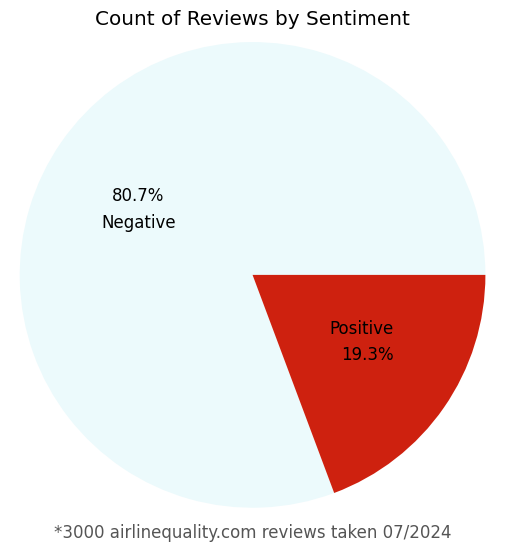

In [40]:
# Generate a pie chart to show the count of reviews by sentiment category
ax = df['Sentiment_Category'].value_counts().sort_index().plot(
    kind='pie',                   # Specify that we want a pie chart
    title='Count of Reviews by Sentiment',  # Title of the chart
    figsize=(7.8, 6.3),           # Size of the figure
    autopct='%1.1f%%',            # Display the percentage value on the pie slices
    colors=["#ecfafc", "#ce210f"], # Custom colors for the pie slices
    labeldistance=0.4,            # Distance of the label from the center of the pie
    radius=1.2,                   # Radius of the pie chart
    fontsize=12                   # Font size for the labels
)

# Set the x-label to provide context for the data
ax.set_xlabel('*3000 airlinequality.com reviews taken 07/2024')
# Remove the y-label as it is not necessary for a pie chart
ax.set_ylabel('')
# Set font size for y-tick labels (not used in pie charts but included for consistency)
plt.yticks(fontsize=12)
# Set font size for x-tick labels (not used in pie charts but included for consistency)
plt.xticks()

# Save the pie chart as a PNG file with a transparent background
plt.savefig('review_count.png', transparent=True)
# Display the pie chart
plt.show()

I want to show the relationship between Verified and Unverified reviews, and Positive and Negative reviews. So I have created a pivot table to hold this information and used a stacked bar plot to visualise.

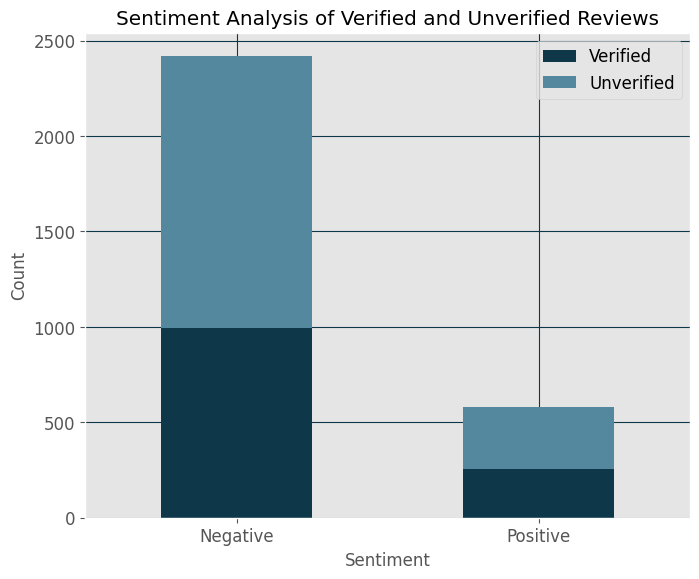

In [41]:
# Pivot the DataFrame for a stacked bar plot
pivot_df = df.pivot_table(index='Sentiment_Category', columns='verified_review', aggfunc='size', fill_value=0)

# Changing the order for a better appearance
ordered_pivot_df = pd.DataFrame({
    'Verified': pivot_df[True],
    'Unverified': pivot_df[False]
}).fillna(0)

# Plot a stacked bar chart with the desired order
ordered_pivot_df.plot(kind='bar', stacked=True, figsize=(7.8,6.3), color=["#0e3849", "#54889f"])

# Changing grid colour
plt.grid(color='#0e3849')

# Customize legend labels
plt.legend(['Verified', 'Unverified'], loc='upper right', fontsize=12)

# Add titles and labels
plt.title('Sentiment Analysis of Verified and Unverified Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Save plot as file 
plt.savefig('verified_review_count.png', transparent=True)

# Display the plot
plt.show()

I will now create two word clouds, one with common words from positive reviews and another with common words from negative reviews. Although lots of stop words were removed for NLP I now need to remove more as some words like, 'would' and 'said', are useful for NLP but not for the word cloud. I did this through trial and error.

In [42]:
# Load stopwords and extend the list
stop_words = set(stopwords.words('english'))
additional_stopwords = {'said', 'got', 'could', 'would', 'also', 'one', 'two', 'three', 'four', 'five', 'u', 'us', 'british airway', 'british airways', 'ba', 'british', 'airway', 'get', 'hour', 'day', 'night', 'told', 'even', 'airways', 'used', 'review'}
stop_words.update(additional_stopwords)

# Function to re-tokenize text and remove stopwords
def tokenise_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Filter out non-alphabetic tokens and stopwords
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return words

# Apply re-tokenisation to the 'processed_reviews' column
df['tokenised_reviews'] = df['processed_reviews'].apply(tokenise_text)

To create the word cloud I have used the previously loaded WordCloud module with Matplotlib.

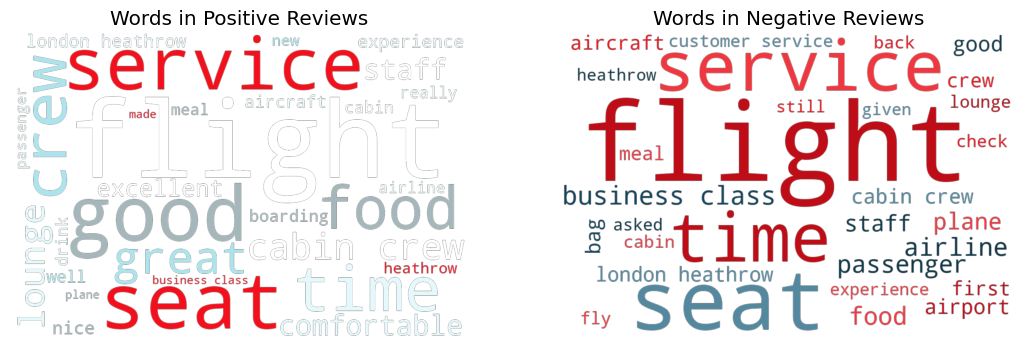

In [43]:
# Colour maps created for plots
colors = ["#0e3849", "#0e3748", "#11435a", "#124861", "#54889f", "#f2101c", "#be0d16", "#ef3740"]
my_cmap = ListedColormap(colors, name="my_cmap")

neg_colors = ["#ecfafc", "#e5f8fb", "#a5b7ba", "#ffffff", "#ace4ed", "#f2101c"]
neg_cmap = ListedColormap(neg_colors, name="neg_cmap")

# Separate positive and negative reviews
positive_reviews = df[df['Polarity'] > 0]['tokenised_reviews']
negative_reviews = df[df['Polarity'] < 0]['tokenised_reviews']

# Flatten the lists of tokens
positive_tokens = [word for review in positive_reviews for word in review]
negative_tokens = [word for review in negative_reviews for word in review]

# Create word clouds
positive_wordcloud = WordCloud(width=1200, height=800, margin=10, mode="RGBA", background_color=None, max_words=30, colormap=neg_cmap).generate(' '.join(positive_tokens))
negative_wordcloud = WordCloud(width=1200, height=800, margin=10, mode="RGBA", background_color=None, max_words=30, colormap=my_cmap).generate(' '.join(negative_tokens))

# Display the word clouds
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Words in Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Words in Negative Reviews')
plt.axis('off')

plt.savefig('demo2.png', transparent=True)

plt.show()

Finally I want to find common phrases in positive reviews and in negative reviews and show them on a bar plot. To do this I used a function to extract multi word phrases from the text, these are called **n-grams**, I chose to explore 3 word and 4 word phrases.

In [44]:
# Define custom stop words and multi-word stop phrases
custom_stop_words = {'gurvir', 'ba', 'review', 'verified', 'via'}
multi_word_stop_phrases = ['british airway', 'british airways']

# Get the existing set of NLTK stop words
nltk_stop_words = set(stopwords.words('english'))

# Combine the NLTK stop words with custom stop words
combined_stop_words = nltk_stop_words.union(custom_stop_words)

# Function to replace multi-word stop phrases
def replace_multi_word_phrases(text, phrases):
    for phrase in phrases:
        text = text.replace(phrase, '')
    return text

# Function to preprocess text with the combined stop words and multi-word phrases
def preprocess_text(text):
    # Replace multi-word stop phrases
    text = replace_multi_word_phrases(text, multi_word_stop_phrases)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords using the combined set
    filtered_tokens = [word for word in tokens if word not in combined_stop_words]
    return filtered_tokens

# Apply preprocessing once and store the results
df['processed_tokens'] = df['processed_reviews'].apply(preprocess_text)

# Function to extract n-grams from tokens
def extract_ngrams(tokens, num):
    n_grams = ngrams(tokens, num)
    return [' '.join(grams) for grams in n_grams]

# Initialize counters for positive and negative n-grams
positive_ngrams = Counter()
negative_ngrams = Counter()

# Process each review and update the counters based on sentiment
for index, row in df.iterrows():
    tokens = row['processed_tokens']
    ngrams_list = extract_ngrams(tokens, 3) + extract_ngrams(tokens, 4)
    
    if row['Sentiment_Category'] in ['Positive']:
        positive_ngrams.update(ngrams_list)
    elif row['Sentiment_Category'] in ['Negative']:
        negative_ngrams.update(ngrams_list)

# Get the most common positive and negative n-grams
most_common_positive_ngrams = positive_ngrams.most_common(10)
most_common_negative_ngrams = negative_ngrams.most_common(10)

I created a plot with the results on two customised bar charts.

C:\Users\reece\AppData\Local\Temp\ipykernel_23304\1959139270.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='ngram', data=pos_ngram_df, palette=colors)


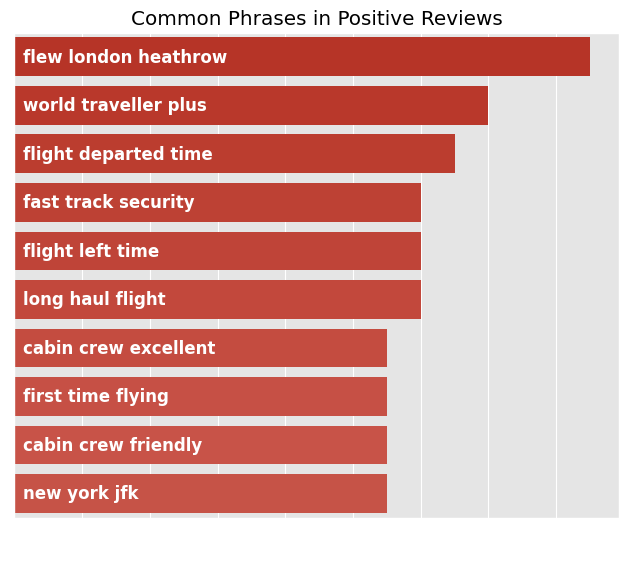

In [45]:
# New colour set creating a gradient effect on the plot
colors = [
    '#ce210f',
    '#d02514',
    '#d22a18',
    '#d42e1d',
    '#d63221',
    '#d83626',
    '#da3a2a',
    '#dc3e2f',
    '#dd4133',
    '#db4232'
]

pos_ngram_df = pd.DataFrame(most_common_positive_ngrams, columns=['ngram', 'count'])

# Create the bar plot
plt.figure(figsize=(7.8, 6.3))
ax = sns.barplot(x='count', y='ngram', data=pos_ngram_df, palette=colors)

# Add text labels inside the bars aligned to the left with a margin
for i, bar in enumerate(ax.patches):
    ax.text(
        0.25,  # Adjust this value for left margin
        bar.get_y() + bar.get_height() / 2,
        f'{pos_ngram_df["ngram"][i]}',
        ha='left',
        va='center',
        color='white',
        weight='bold',
        fontsize=12
    )

# Customise plot
plt.title('Common Phrases in Positive Reviews')
ax.set_yticklabels([])
ax.tick_params(colors='white')
plt.tick_params(axis='y', direction='in')
plt.xlabel('Count', color='white')
plt.ylabel(None)


# Save and show the plot
plt.savefig('ngramsplot.png', transparent=True)
plt.show()

C:\Users\reece\AppData\Local\Temp\ipykernel_23304\1384188778.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='ngram', data=neg_ngram_df, palette=colors)


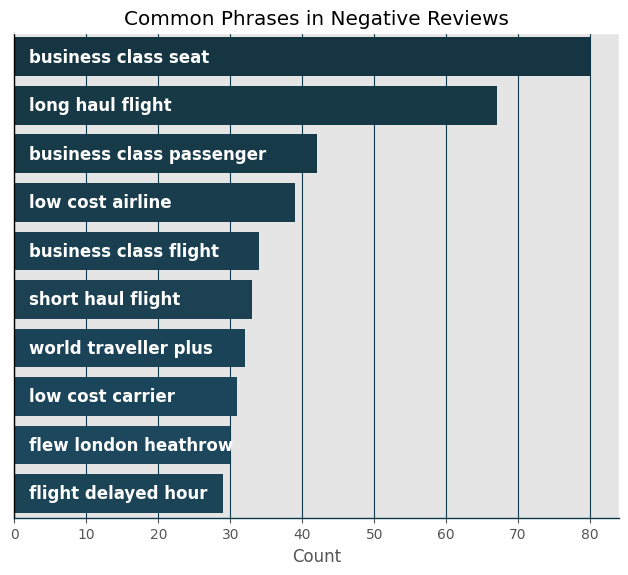

In [46]:
# New colour set creating a gradient effect on the plot
colors = [
    '#0e3849',
    '#0f3b4d',
    '#0f3d51',
    '#104055',
    '#104259',
    '#11445d',
    '#114661',
    '#114964',
    '#114b68',
    '#124861'
]

neg_ngram_df = pd.DataFrame(most_common_negative_ngrams, columns=['ngram', 'count'])

# Create the bar plot
plt.figure(figsize=(7.8, 6.3))
ax = sns.barplot(x='count', y='ngram', data=neg_ngram_df, palette=colors)

# Add text labels inside the bars aligned to the left with a margin
for i, bar in enumerate(ax.patches):
    ax.text(
        2,  # Adjust this value for left margin
        bar.get_y() + bar.get_height() / 2,
        f'{neg_ngram_df["ngram"][i]}',
        ha='left',
        va='center',
        color='white',
        weight='bold',
        fontsize=12
    )

# Customise plot
plt.title('Common Phrases in Negative Reviews')
plt.box(on=True)
plt.grid(axis='x',color='#0e3849')
ax.spines['bottom'].set_color('#0e3849')
ax.spines['left'].set_color('0e3849')
ax.set_yticklabels([])
plt.tick_params(axis='y', direction='in')
plt.xlabel('Count')
plt.ylabel(None)

# Save and show the plot
plt.savefig('ngramsplot2.png', transparent=True)
plt.show()

### In summary:

I am very pleased with the appearance of the slide, the customisation of the plots was key in this and the advice I found on StackOverflow was very useful. 

I will be looking further into the sentiment pipeline to see if I can improve the accuracy, based on the random reviews I pulled the result was accurate but the score was wildly skewed meaning there are probably some neutral reviews in there that are being mis-calculated.

Whilst evaluating my code I notice that I have reproduced the tokens a few times and I could probably have streamlined this, along with the stop words. This is something I will aim to improve.